Random Forest : Data is from LendingClub.com.

<b>Import libraries to work with the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b>Read or extract the data 

In [2]:
loans = pd.read_csv('loan_data.csv')

<b> Check the data 

In [3]:
loans.head

<bound method DataFrame.head of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
5                 1         credit_card    0.0788       125.13   
6                 1  debt_consolidation    0.1496       194.02   
7                 1           all_other    0.1114       131.22   
8                 1    home_improvement    0.1134        87.19   
9                 1  debt_consolidation    0.1221        84.12   
10                1  debt_consolidation    0.1347       360.43   
11                1  debt_consolidation    0.1324       253.58   
12                1  debt_consolidation    0.0859       316.11   
13                1      small_business    0

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe

<bound method DataFrame.describe of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
5                 1         credit_card    0.0788       125.13   
6                 1  debt_consolidation    0.1496       194.02   
7                 1           all_other    0.1114       131.22   
8                 1    home_improvement    0.1134        87.19   
9                 1  debt_consolidation    0.1221        84.12   
10                1  debt_consolidation    0.1347       360.43   
11                1  debt_consolidation    0.1324       253.58   
12                1  debt_consolidation    0.0859       316.11   
13                1      small_business 

<b> Exploratory Data Analysis of the data, run some visuals, look for outliers. 

Text(0.5,0,'FICO')

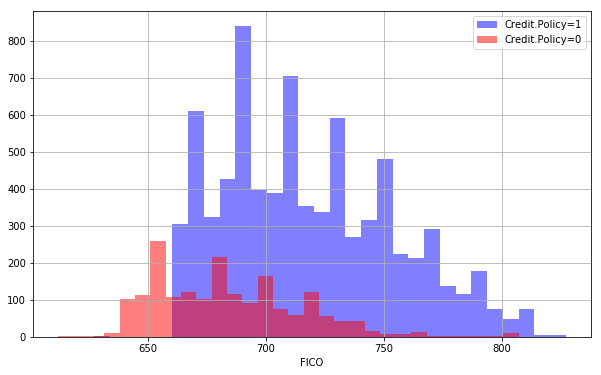

In [7]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                             bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

<b> Check data for fully paid vs not fully paid loans. 

Text(0.5,0,'FICO')

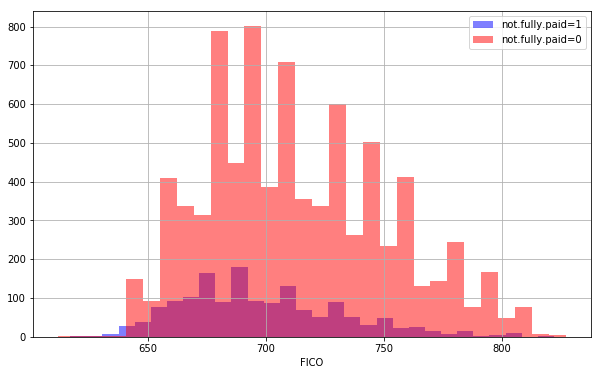

In [9]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<b> Plot the data side by side as histogram for  2 values of not.fully.paid

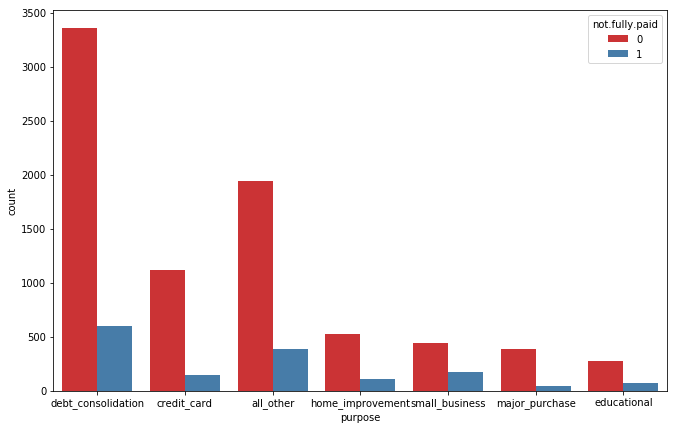

In [10]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

<b> FICO score vs Interest rate 

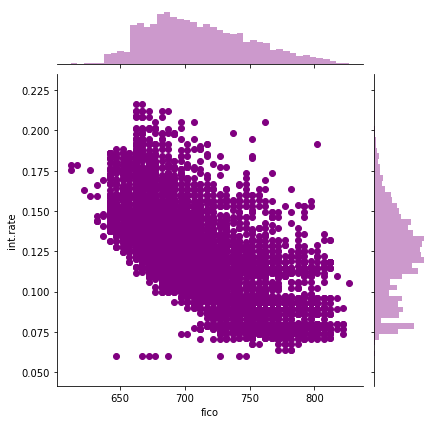

In [11]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<b>Setting up data for Random Forest Model 

In [12]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [13]:
cat_ftr = ['purpose']

In [14]:
#dealing with categorical var 
final_data = pd.get_dummies(loans,columns=cat_ftr,drop_first=True)

In [15]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

<b> Train Test Split using Sklearn

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

<b>Training a Decision Tree Model
    

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
#instantiate Decision tree classifier
dtree = DecisionTreeClassifier()

In [20]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Predictions and Evaluation of Decision Tree
Create predictions from the test set and create a classification report and a confusion matrix.

In [21]:
predictions = dtree.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.18      0.21      0.20       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [24]:
print(confusion_matrix(y_test,predictions))

[[1996  435]
 [ 348   95]]


# Training the Random Forest model
Now its time to train our model!
Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=600)

In [27]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Predictions and Evaluation
Let's predict off the y_test values and evaluate our model.


In [28]:
predictions = rfc.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.59      0.02      0.04       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



# Show the Confusion Matrix for the predictions.


In [31]:
print(confusion_matrix(y_test,predictions))

[[2424    7]
 [ 433   10]]
